# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.**

# ETAPA 1:

**Preparação dos Dados**

**Exploração e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**Análise:** Construa uma storytelling com gráficos, analisando e retirando insights das informações.

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv('marketing_campaign.csv', delimiter=';')

In [3]:
df.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
0,1957,Graduation,Single,58138.0,0,58,635,88,546,172,88,88,4,7,0,1
1,1954,Graduation,Single,46344.0,1,38,11,1,6,2,1,6,2,5,0,0
2,1965,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,10,4,0,1
3,1984,Graduation,Together,26646.0,1,26,11,4,20,10,3,5,4,6,0,0
4,1981,PhD,Married,58293.0,1,94,173,43,118,46,27,15,6,5,0,1
5,1967,Master,Together,62513.0,0,16,520,42,98,0,42,14,10,6,0,1
6,1971,Graduation,Divorced,55635.0,0,34,235,65,164,50,49,27,7,6,0,1
7,1985,PhD,Married,33454.0,1,32,76,10,56,3,1,23,4,8,0,1
8,1974,PhD,Together,30351.0,1,19,14,0,24,3,3,2,2,9,0,0
9,1950,PhD,Together,5648.0,1,68,28,0,6,1,1,13,0,20,0,0


Verificação do tipo de dados se eles correspondem ao que propõem

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Kidhome            2240 non-null   int64  
 5   Recency            2240 non-null   int64  
 6   MntWines           2240 non-null   int64  
 7   MntFruits          2240 non-null   int64  
 8   MntMeatProducts    2240 non-null   int64  
 9   MntFishProducts    2240 non-null   int64  
 10  MntSweetProducts   2240 non-null   int64  
 11  MntGoldProds       2240 non-null   int64  
 12  NumStorePurchases  2240 non-null   int64  
 13  NumWebVisitsMonth  2240 non-null   int64  
 14  Complain           2240 non-null   int64  
 15  WebPurchases       2240 non-null   int64  
dtypes: float64(1), int64(13)

Verificação de dados nulos:

In [5]:
(df.isnull().sum() / df.shape[0]) *100

,0
Year_Birth,0.000000
Education,0.000000
Marital_Status,0.000000
Income,1.071429
Kidhome,0.000000
Recency,0.000000
MntWines,0.000000
MntFruits,0.000000
MntMeatProducts,0.000000
MntFishProducts,0.000000


Existe 1,07% de dados nulos na coluna: 'Income', por ser uma quantidade pequena optarei por apagar os dados nulos

In [6]:
df.dropna(subset=['Income'], inplace=True)

Verificação de possíveis outliers:

In [7]:
df.describe()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,5.800993,5.319043,0.009477,0.504513
std,11.985554,25173.076661,0.536896,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,3.250785,2.425359,0.096907,0.500092
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,5.000000,6.000000,0.000000,1.000000
75%,1977.000000,68522.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,8.000000,7.000000,0.000000,1.000000
max,1996.000000,666666.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,13.000000,20.000000,1.000000,1.000000


Existem alguma variáveis com a possibilidade de outiliers como por exemplo: MntWines, MntFruits, MnMeatProducts, MntFishProducts, MntSweetProducts e MntGoldProds  

In [8]:
fig = px.box(df, y=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])
fig.show()

Na visualização gráfica é possivel verificar três outliers que mais se destacam principalmente na coluna 'MntProducts', o restante até segue uma linha que faz sentido, já que há uma crescente nos valores, farei o tratamento na etapa 2 com as demais colunas.

---
##Tratamento:

Transformar o ano de nascimento em idade

In [9]:
current_year = 2025
df['Age'] = current_year - df['Year_Birth']

Transformar a coluna 'Education' de uma forma que o modelo seja capaz de entender

In [10]:
print(df['Education'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [11]:
education_dummies = pd.get_dummies(df['Education'], prefix='Education', dtype=float)
df = pd.concat([df, education_dummies], axis=1)

In [12]:
df = df.drop('Education', axis=1)

Tratar também a coluna de Estado civil

In [13]:
df = pd.get_dummies(df, columns=['Marital_Status'], prefix='Marital', drop_first=True, dtype=float)

Remover possíveis outliers

In [14]:
df = df[df['Age'] < 100]
df = df[df['Income'] < 180000]

Vou criar uma coluna que possua o valor gasto total considerando todas as colunas que possuem gastos

In [15]:
mnt_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Spent'] = df[mnt_cols].sum(axis=1)

In [16]:
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [17]:
cols_to_drop = ['ID', 'Dt_Customer', 'Year_Birth'] + spending_cols
df_ml = df.drop(columns=cols_to_drop, errors='ignore')

---
##Análise bivariada:

In [18]:
fig_scatter = px.scatter(df, x='Income', y='Spent', color='WebPurchases',
                         hover_data=['Spent', 'Income'],
                         title='Renda x Gasto Total por Intenção de Compra Web',
                         labels={'Income': 'Renda (Income)', 'Spent': 'Gasto Total (Spent)', 'WebPurchases': 'Comprou na Web'})
fig_scatter.show()

Por meio do gráfico acima podemos perceber que exite uma gama considerável de pessoas que não realizam compras mesmo com salários anuais variando de 0 a 60k, o que normalmente é um valor mais baixo de fato de renda o que nos revela que os produtos que da web possivelmente sejam mais caros e não somente isto, mas também possuem frete.

In [19]:
fig_scatter = px.scatter(df, x='Age', y='Income', color='Spent',
                         hover_data=['Age', 'Income'],
                         title='Idade x Salário',
                         labels={'Age': 'Idade', 'Income': 'Salário', 'Spent': 'Gasto total'})
fig_scatter.show()

Para o gráfico acima trouxe a análise com base na idade, podendo assim analisar melhor como é destribuído pelas idades o salário anual de cada usuário, podemos perceber que os dados se concentram muito mais na faixa de 47 à 66 anos, mesmo com alguns salários baixos o que é comum a crescente é maior para esta faixa.

In [20]:
fig_scatter_3d = px.scatter_3d(
    df,
    x='Age',
    y='Income',
    z='Spent',
    color='Spent',
    # NOVA ESCALA DE CORES: Tons de Azul (intuitivo para representar quantidade crescente)
    color_continuous_scale=['#CCE5FF', '#99CCFF', '#66B2FF', '#3399FF', '#0066CC', '#003366'], # Azuis claros para escuros
    hover_data=['Age', 'Income'],
    title='🔵 Relação entre Idade, Salário e Gasto Total',
    labels={'Age': 'Idade', 'Income': 'Salário', 'Spent': 'Gasto Total'}
)

# Padrão visual dos pontos
fig_scatter_3d.update_traces(
    marker=dict(
        size=8,        # Aumentei o tamanho para melhor visualização em fundo claro
        opacity=1.0,   # Transparência removida
        symbol='circle',
        line=dict(width=1, color='#003366') # Cor da linha mais escura para contraste no fundo branco
    )
)

# Personalização do layout (tema CLARO + fundo branco)
fig_scatter_3d.update_layout(
    template='plotly_white', # Tema branco
    paper_bgcolor='white',   # Fundo do papel branco
    plot_bgcolor='white',    # Fundo da área do gráfico branco
    scene=dict(
        xaxis_title='Idade',
        yaxis_title='Salário',
        zaxis_title='Gasto Total',
        xaxis=dict(
            gridcolor='lightgray', # Cor da grade ajustada para fundo claro
            zerolinecolor='gray',
            showbackground=True,
            backgroundcolor='#F5F5F5' # Fundo dos eixos em cinza muito claro
        ),
        yaxis=dict(
            gridcolor='lightgray',
            zerolinecolor='gray',
            showbackground=True,
            backgroundcolor='#F5F5F5'
        ),
        zaxis=dict(
            gridcolor='lightgray',
            zerolinecolor='gray',
            showbackground=True,
            backgroundcolor='#F5F5F5'
        )
    ),
    title=dict(
        x=0.5,
        font=dict(size=22, family='Arial Black', color='#003366') # Cor do título azul escuro
    ),
    coloraxis_colorbar=dict(
        title="💰 Gasto Total",
        tickprefix='R$ ',
        title_side='top',
        tickfont=dict(color='#003366'), # Cor da barra de cores azul escuro
        titlefont=dict(color='#003366'),
        xanchor='left',
        x=1.05
    ),
    margin=dict(l=0, r=0, b=0, t=70)
)

# 💡 Anotação lateral explicativa (ajustada para o novo esquema de cores)
fig_scatter_3d.add_annotation(
    text=(
        "💡 <b>Interpretação das Cores</b><br>"
        "• ⚪ Azul Claro: Menor Gasto Total<br>"
        "• ⚫ Azul Escuro: Maior Gasto Total<br>"
        "• Pontos representam clientes individuais<br>"
        "• Eixos: Idade, Salário e Gasto Total"
    ),
    showarrow=False,
    xref='paper', yref='paper',
    x=1.18, y=0.5,
    align='left',
    font=dict(size=12, color='#003366'), # Cor da anotação azul escuro
    bgcolor='rgba(204,229,255,0.4)', # Fundo da anotação azul claro translúcido
    bordercolor='rgba(0,51,102,0.6)', # Borda da anotação azul escuro
    borderwidth=1,
    borderpad=10
)

fig_scatter_3d.show()

Para o último gráfico da nossa análise optei por trazer um gráfico bem mais visual, com a possibilidade de olharmos mais detalhadamente para os nossos dados de uma forma individual, por conta disso podemos ter insights melhores, por meio dele podemos ver que quanto maior o salário, mais gastos totais possui e ainda assim segue uma linha crescente destes fatos

# ETAPA 2:
**Pré-processamento**

**Análise Correlação:** Verifique a correlação entre as váriaveis e análise se há espaço para retirar váriaveis que não te parecem importantes.

**Codificação de Variáveis Categóricas:** Transformar variáveis categóricas em um formato que os modelos de machine learning possam interpretar.


**Separe a base em Y, X e Treino e teste:**: Faça a separação da base.

**Realize a padronização dos dados**: Padronize os dados para garantir eficiência no modelo e eficácia.








In [21]:
# seu código aqui
df.corr()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Alone,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow,Marital_YOLO,Spent
Year_Birth,1.000000,-0.199977,0.237497,-0.015694,-0.164615,-0.013447,-0.033622,-0.041154,-0.021516,-0.059779,...,-0.074694,-0.122861,0.012872,-0.068620,0.044500,0.125413,-0.053574,-0.163661,0.010508,-0.115901
Income,-0.199977,1.000000,-0.514523,0.007965,0.688209,0.507354,0.692279,0.520040,0.523599,0.388299,...,0.019802,0.101006,-0.013989,0.015002,-0.008640,-0.023724,0.004369,0.039638,-0.004930,0.792740
Kidhome,0.237497,-0.514523,1.000000,0.010623,-0.497203,-0.373258,-0.439031,-0.388643,-0.377843,-0.354922,...,0.013127,-0.042918,0.038327,-0.019354,0.018114,0.015254,0.009236,-0.071975,-0.024751,-0.557949
Recency,-0.015694,0.007965,0.010623,1.000000,0.015981,-0.005257,0.022914,0.000788,0.025244,0.018148,...,-0.026142,-0.007896,-0.023798,0.002989,-0.019487,0.004234,0.021239,-0.001413,-0.047842,0.020479
MntWines,-0.164615,0.688209,-0.497203,0.015981,1.000000,0.385844,0.568081,0.396915,0.389583,0.391461,...,0.036504,0.157988,-0.013181,0.021161,-0.012810,-0.020567,0.004999,0.034590,0.001491,0.892996
MntFruits,-0.013447,0.507354,-0.373258,-0.005257,0.385844,1.000000,0.546740,0.593038,0.571474,0.393459,...,-0.055426,-0.085349,-0.020709,0.010226,-0.013626,0.012936,-0.015084,0.026294,-0.017662,0.612129
MntMeatProducts,-0.033622,0.692279,-0.439031,0.022914,0.568081,0.546740,1.000000,0.572986,0.534624,0.357556,...,-0.008148,0.004440,-0.023126,-0.024685,-0.021757,0.042170,-0.002673,0.015395,-0.015703,0.845543
MntFishProducts,-0.041154,0.520040,-0.388643,0.000788,0.396915,0.593038,0.572986,1.000000,0.583484,0.426299,...,-0.049971,-0.105097,-0.020177,-0.015492,-0.031689,0.011304,0.014594,0.042229,-0.018485,0.641884
MntSweetProducts,-0.021516,0.523599,-0.377843,0.025244,0.389583,0.571474,0.534624,0.583484,1.000000,0.356754,...,-0.067505,-0.087014,-0.017983,-0.001071,-0.005713,0.001052,-0.012010,0.049689,-0.017609,0.606652
MntGoldProds,-0.059779,0.388299,-0.354922,0.018148,0.391461,0.393459,0.357556,0.426299,0.356754,1.000000,...,-0.032134,-0.121404,-0.012066,0.016217,-0.016613,-0.005348,-0.011264,0.043529,-0.001121,0.527101


Deixarei de uma forma mais visual para entendermos melhor a correlação, sem a necessidade do gráfico que por conta da quantidade de colunas ficará complicado de retirar insights

In [22]:
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()

In [23]:
duplicate_cols = df.columns[df.columns.duplicated(keep=False)]
print(f"Colunas duplicadas: {duplicate_cols}")

Colunas duplicadas: Index([], dtype='object')


In [24]:
columns_to_keep = ~correlation_matrix.columns.duplicated(keep='first')

In [25]:
correlation_matrix_unique = correlation_matrix.loc[columns_to_keep, columns_to_keep]

In [26]:
correlation_pairs = correlation_matrix_unique.unstack().sort_values(ascending=False)

In [27]:
strong_correlations = correlation_pairs[correlation_pairs != 1.0]

In [28]:
top_10_positive = strong_correlations[strong_correlations > 0].head(10)
top_10_negative = strong_correlations[strong_correlations < 0].tail(10).sort_values()

Foi necessário que eu fizesse a remoção das colunas que estavam duplicadas para conseguir printar as 10 correlações positivas e negativas

In [29]:
print("Top 10 Correlações Positivas:")
print(top_10_positive)

print("\nTop 10 Correlações Negativas:")
print(top_10_negative)

Top 10 Correlações Positivas:
MntWines         Spent              0.892996
Spent            MntWines           0.892996
                 MntMeatProducts    0.845543
MntMeatProducts  Spent              0.845543
Income           Spent              0.792740
Spent            Income             0.792740
MntMeatProducts  Income             0.692279
Income           MntMeatProducts    0.692279
                 MntWines           0.688209
MntWines         Income             0.688209
dtype: float64

Top 10 Correlações Negativas:
Year_Birth            Age                    -1.000000
Age                   Year_Birth             -1.000000
Income                NumWebVisitsMonth      -0.650257
NumWebVisitsMonth     Income                 -0.650257
Kidhome               Spent                  -0.557949
Spent                 Kidhome                -0.557949
NumWebVisitsMonth     MntMeatProducts        -0.539194
MntMeatProducts       NumWebVisitsMonth      -0.539194
Education_PhD         Education_Gr

Será muito necessário fazer a diminuição de colunas principalmente que há colunas 'Repetidas' por exemplo: 'Year Birth' e 'Age', além de todas de compra já que temos a coluna 'Spent'

As correlações que temos são muito boas, porém é necessário tomar cuidado porque temos valores altos positivos e negativos. Terei que fazer o tratamento novamente retirando as colunas para ter as correlações com valores reais

In [30]:
cols_to_remove_from_df = [
    'ID',
    'Year_Birth',
    'Dt_Customer',
    'Spent',
    'Kidhome',
    'Teenhome',
    'Education',
    'Marital_Status'
]

# Filtra apenas as colunas que ainda existem no df para evitar erros
existing_cols_to_remove = [col for col in cols_to_remove_from_df if col in df.columns]
df = df.drop(columns=existing_cols_to_remove, errors='ignore')

print(f"Colunas removidas do df: {existing_cols_to_remove}")
print(f"Número de colunas restantes no df: {df.shape[1]}")

Colunas removidas do df: ['Year_Birth', 'Spent', 'Kidhome']
Número de colunas restantes no df: 25


Agora que possuo um df mais limpo podemos seguir para a fase de treino e teste, decidi por retirar a coluna spent por conta que ela não seria capaz de dar tantos detalhes e informações para o modelo de machine learning neste ponto, porém foi muito útil para a análise gráfica

In [31]:
y = df['WebPurchases']
X = df.drop('WebPurchases', axis=1)

Base separada em 70% para treubi e 30% de teste

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Formato de X_train: {X_train.shape}")
print(f"Formato de X_test: {X_test.shape}")
print(f"Formato de y_train: {y_train.shape}")
print(f"Formato de y_test: {y_test.shape}")

Formato de X_train: (1548, 24)
Formato de X_test: (664, 24)
Formato de y_train: (1548,)
Formato de y_test: (664,)


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Criaremos novas variáveis para os dados escalados
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transforma os dados de teste usando o mesmo scaler ajustado no treino
X_test_scaled = scaler.transform(X_test)

print("Dados de treino e teste padronizados e prontos para a Modelagem.")
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
print(f"\nExemplo de dados escalados (média próxima de 0, desvio padrão próximo de 1):")
print(X_train_scaled_df.describe().loc[['mean', 'std']])

Dados de treino e teste padronizados e prontos para a Modelagem.

Exemplo de dados escalados (média próxima de 0, desvio padrão próximo de 1):
            Income       Recency      MntWines     MntFruits  MntMeatProducts  \
mean  9.122763e-17  1.606524e-17  2.409786e-17 -2.065531e-17     6.426097e-17   
std   1.000323e+00  1.000323e+00  1.000323e+00  1.000323e+00     1.000323e+00   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumStorePurchases  \
mean    -3.672055e-17     -2.409786e-17  7.458863e-18       1.399971e-16   
std      1.000323e+00      1.000323e+00  1.000323e+00       1.000323e+00   

      NumWebVisitsMonth  ...  Education_Graduation  Education_Master  \
mean      -1.118829e-16  ...          6.885104e-18     -9.180139e-18   
std        1.000323e+00  ...          1.000323e+00      1.000323e+00   

      Education_PhD  Marital_Alone  Marital_Divorced  Marital_Married  \
mean   2.295035e-17   1.606524e-17      9.180139e-18     3.385176e-17   
std    1.000323e+00  

Aqui agora utilizarei o PCA para evitar ruído nos dados e resultados

In [35]:
mnt_cols = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

existing_mnt_cols = [col for col in mnt_cols if col in X_train.columns]

if not existing_mnt_cols:
    print("ERRO: As colunas MNT não foram encontradas no X_train. Por favor, verifique se elas não foram removidas acidentalmente em etapas anteriores.")
else:

    X_train_mnt = X_train[existing_mnt_cols]
    X_test_mnt = X_test[existing_mnt_cols]

In [36]:
pca_mnt = PCA(n_components=2, random_state=42)

# Ajusta (fit) e transforma apenas no conjunto de treino
pca_components_train = pca_mnt.fit_transform(X_train_mnt)

# Transforma o conjunto de teste usando o PCA ajustado no treino
pca_components_test = pca_mnt.transform(X_test_mnt)

print(f"Variância explicada pelos 2 componentes: {np.sum(pca_mnt.explained_variance_ratio_):.4f}")

# Cria DataFrame para os novos componentes
pca_df_train = pd.DataFrame(
    data = pca_components_train,
    columns = ['PCA_Gasto_1', 'PCA_Gasto_2'],
    index = X_train.index
)
pca_df_test = pd.DataFrame(
    data = pca_components_test,
    columns = ['PCA_Gasto_1', 'PCA_Gasto_2'],
    index = X_test.index
)

Variância explicada pelos 2 componentes: 0.9626


In [38]:
X_train_final = X_train.drop(columns=existing_mnt_cols)
X_test_final = X_test.drop(columns=existing_mnt_cols)

# Adiciona os novos componentes PCA
X_train_final = pd.merge(X_train_final, pca_df_train, left_index=True, right_index=True)
X_test_final = pd.merge(X_test_final, pca_df_test, left_index=True, right_index=True)

print("\n--- Novo Conjunto de Features (X) Criado ---")
print(f"Formato final de X_train: {X_train_final.shape}")
print(f"Novas colunas adicionadas: PCA_Gasto_1, PCA_Gasto_2")
print(f"Features restantes: {X_train_final.columns.tolist()}")


--- Novo Conjunto de Features (X) Criado ---
Formato final de X_train: (1548, 20)
Novas colunas adicionadas: PCA_Gasto_1, PCA_Gasto_2
Features restantes: ['Income', 'Recency', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Age', 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Alone', 'Marital_Divorced', 'Marital_Married', 'Marital_Single', 'Marital_Together', 'Marital_Widow', 'Marital_YOLO', 'PCA_Gasto_1', 'PCA_Gasto_2']


Foi indicado que fosse feito novamente a padronização dos dados

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

# ETAPA 3:

**Modelagem**

Escolha ao menos 2 técnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classificação binária.

Iniciarei com o Random Forest, porém utilizando a base comum sem scaler

In [40]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X_train_final, y_train)
y_pred_rf = rf_model.predict(X_test_final)

Em seguida utilizarei a regressão logística:

In [42]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# ETAPA 4:

**Avaliação**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previsões.

Utilize além das métricas padrões a matriz de confusão.

In [43]:
# seu código aqui
# Relatório de Classificação (Random Forest)
print("Avaliação do Random Forest:")
print(classification_report(y_test, y_pred_rf))

Avaliação do Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       333
           1       0.87      0.94      0.90       331

    accuracy                           0.90       664
   macro avg       0.90      0.90      0.90       664
weighted avg       0.90      0.90      0.90       664



Temos bons resultados com a utilização do Random Forest ele nos garate uma precisão alta para os que não compraram, porém menor para aqueles que compraram apesar de um recall inverso

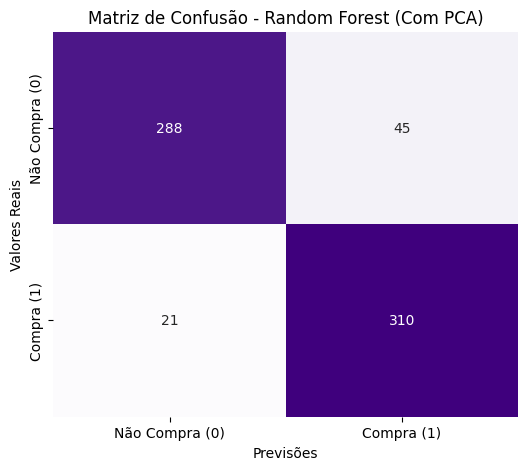

In [47]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['Não Compra (0)', 'Compra (1)'],
            yticklabels=['Não Compra (0)', 'Compra (1)'])
plt.title('Matriz de Confusão - Random Forest (Com PCA)')
plt.ylabel('Valores Reais')
plt.xlabel('Previsões')
plt.show()

Como podemos verificar na matriz de confusão não temos valores altos nos erros, pode ser avaliado sim como um modelo adequado, porém é necessário cuidado por conta de valores muito altos

---

In [45]:
print("\nAvaliação da Regressão Logística:")
print(classification_report(y_test, y_pred_lr))


Avaliação da Regressão Logística:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       333
           1       0.84      0.82      0.83       331

    accuracy                           0.84       664
   macro avg       0.84      0.84      0.84       664
weighted avg       0.84      0.84      0.84       664



Já com a regressão logística tivemos um resultado pior se comparado com o Random Forest, as previsões quase identicas para não compradores e compradores passa credibilidade e conforto, mostra que o modelo não está enviesado e trata as variáveis de forma real. Recall e f1-score também apresentam resultados parelhos o que é bem positivo

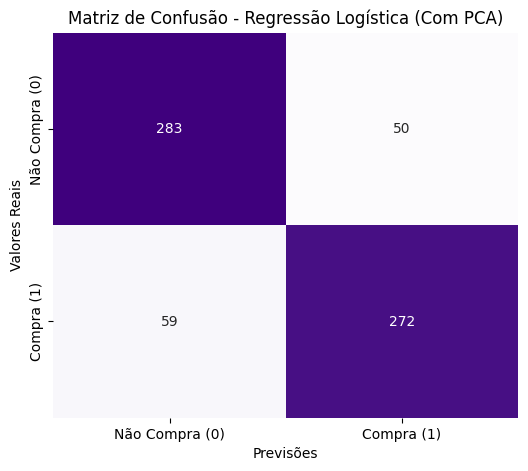

In [46]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['Não Compra (0)', 'Compra (1)'],
            yticklabels=['Não Compra (0)', 'Compra (1)'])
plt.title('Matriz de Confusão - Regressão Logística (Com PCA)')
plt.ylabel('Valores Reais')
plt.xlabel('Previsões')
plt.show()

Resultados muito bons também, parece bem próximo da realidade e possui uma taxa de acerto para 0 e 1 parelhas
---

---
##Resultado final:
Acredito que ambos os modelos foram muito bem, porém a mim passa mais confiança a Regressão logística por conta de ter resultados parelhos para nossa variável target, mesmo que o resultado do random forest tenha sido superior.